数据探索与可视化
实验目标
学习并掌握如何使用Python进行数据探索与可视化。
理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。
实验要求
使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。 使用describe()方法生成数据的描述性统计信息。
对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
使用Matplotlib绘制图表
绘制条形图：展示label列的类别分布。
绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
绘制直方图：展示log_public_repos的对数变换后的数据分布。
绘制散点图：展示public_repos与followers之间的关系。
绘制散点矩阵：展示多个数值型特征之间的成对关系。
使用Seaborn绘制图表
绘制箱线图：展示不同label类别下log_followers的分布。
绘制成对图：展示不同特征之间的成对关系，并根据label分类。
绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
绘制小提琴图：展示label与log_followers之间的分布差异。
使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

1. 数据读取与探索

In [1]:
#from ydata_profiling import ProfileReport 
import pandas as pd

# 读取数据
data = pd.read_csv('D:\github_bot_raw_data.csv')

# 调整pandas显示选项
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.max_rows', 50)      # 显示前50行

# 查看前几行数据
data.head()

,actor_id,label,login,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,gists_url,starred_url,subscriptions_url,organizations_url,repos_url,events_url,received_events_url,type,site_admin,name,company,blog,location,email,hireable,bio,twitter_username,public_repos,public_gists,followers,following,created_at,updated_at
0,1081405,Human,dlazesz,1081405,MDQ6VXNlcjEwODE0MDU=,https://avatars.githubusercontent.com/u/108140...,NaN,https://api.github.com/users/dlazesz,https://github.com/dlazesz,https://api.github.com/users/dlazesz/followers,https://api.github.com/users/dlazesz/following...,https://api.github.com/users/dlazesz/gists{/gi...,https://api.github.com/users/dlazesz/starred{/...,https://api.github.com/users/dlazesz/subscript...,https://api.github.com/users/dlazesz/orgs,https://api.github.com/users/dlazesz/repos,https://api.github.com/users/dlazesz/events{/p...,https://api.github.com/users/dlazesz/received_...,User,False,Indig Balázs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,1,5,1,2011-09-26T17:27:03Z,2023-10-13T11:21:10Z
1,13100598,Human,sarkiroka,13100598,MDQ6VXNlcjEzMTAwNTk4,https://avatars.githubusercontent.com/u/131005...,NaN,https://api.github.com/users/sarkiroka,https://github.com/sarkiroka,https://api.github.com/users/sarkiroka/followers,https://api.github.com/users/sarkiroka/followi...,https://api.github.com/users/sarkiroka/gists{/...,https://api.github.com/users/sarkiroka/starred...,https://api.github.com/users/sarkiroka/subscri...,https://api.github.com/users/sarkiroka/orgs,https://api.github.com/users/sarkiroka/repos,https://api.github.com/users/sarkiroka/events{...,https://api.github.com/users/sarkiroka/receive...,User,False,sarkiroka,NaN,https://sarkiroka.hu,NaN,NaN,True,"I just press the buttons randomly, and the pro...",NaN,30,3,9,6,2015-06-29T10:12:46Z,2023-10-07T06:26:14Z
2,22494,Human,ZoomQuiet,22494,MDQ6VXNlcjIyNDk0,https://avatars.githubusercontent.com/u/22494?v=4,NaN,https://api.github.com/users/ZoomQuiet,https://github.com/ZoomQuiet,https://api.github.com/users/ZoomQuiet/followers,https://api.github.com/users/ZoomQuiet/followi...,https://api.github.com/users/ZoomQuiet/gists{/...,https://api.github.com/users/ZoomQuiet/starred...,https://api.github.com/users/ZoomQuiet/subscri...,https://api.github.com/users/ZoomQuiet/orgs,https://api.github.com/users/ZoomQuiet/repos,https://api.github.com/users/ZoomQuiet/events{...,https://api.github.com/users/ZoomQuiet/receive...,User,False,Zoom.Quiet,蟒营® py.101.camp,http://zoomquiet.io,"ZhuHai,China,Earth",NaN,True,"Time is unimportant,\r\nonly life important.",zoomq,103,49,1212,221,2008-08-29T16:20:03Z,2023-10-02T02:11:21Z
3,7648032,Bot,AlCutter,7648032,MDQ6VXNlcjc2NDgwMzI=,https://avatars.githubusercontent.com/u/764803...,NaN,https://api.github.com/users/AlCutter,https://github.com/AlCutter,https://api.github.com/users/AlCutter/followers,https://api.github.com/users/AlCutter/followin...,https://api.github.com/users/AlCutter/gists{/g...,https://api.github.com/users/AlCutter/starred{...,https://api.github.com/users/AlCutter/subscrip...,https://api.github.com/users/AlCutter/orgs,https://api.github.com/users/AlCutter/repos,https://api.github.com/users/AlCutter/events{/...,https://api.github.com/users/AlCutter/received...,User,False,Al Cutter,NaN,NaN,"Sussex, UK",NaN,NaN,NaN,NaN,49,0,84,2,2014-05-20T18:43:09Z,2023-10-12T12:54:59Z
4,2163522,Human,meetyan,2163522,MDQ6VXNlcjIxNjM1MjI=,https://avatars.githubusercontent.com/u/216352...,NaN,https://api.github.com/users/meetyan,https://github.com/meetyan,https://api.github.com/users/meetyan/followers,https://api.github.com/users/meetyan/following...,https://api.github.com/users/meetyan/gists{/gi...,https://api.github.com/users/meetyan/starred{/...,https://api.github.com/users/meetyan/subscript...,https://api.github.com/users/meetyan/orgs,https://api.github.com/users/meetyan/repos,https://api.github.com/users/meetyan/events{/p...,https://api.github.com/users/meetyan/received_...,User,False,Jiajun Yan,NaN,NaN,NaN,NaN,True

In [2]:
# 查看数据的基本信息
print(data.info())

# 生成描述性统计信息
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20358 entries, 0 to 20357
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   actor_id             20358 non-null  int64  
 1   label                20358 non-null  object 
 2   login                20358 non-null  object 
 3   id                   20358 non-null  int64  
 4   node_id              20358 non-null  object 
 5   avatar_url           20358 non-null  object 
 6   gravatar_id          0 non-null      float64
 7   url                  20358 non-null  object 
 8   html_url             20358 non-null  object 
 9   followers_url        20358 non-null  object 
 10  following_url        20358 non-null  object 
 11  gists_url            20358 non-null  object 
 12  starred_url          20358 non-null  object 
 13  subscriptions_url    20358 non-null  object 
 14  organizations_url    20358 non-null  object 
 15  repos_url            20358 non-null 

2. 数据格式化处理

In [3]:
# 处理日期、货币和百分比格式
# 示例：转换某列为日期格式
data['created_at'] = pd.to_datetime(data['created_at'])

# 示例：将货币格式化为千分位
data['salary'] = [f"${x:,.2f}" for x in data['salary']] if 'salary' in data else None

# 示例：将百分比格式化
data['conversion_rate'] = [f"{x:.2%}" for x in data['conversion_rate']] if 'conversion_rate' in data else None

3.对数变换

In [4]:
import numpy as np
# 对数变换
for col in ['public_repos', 'public_gists', 'followers', 'following']:
    if col in data.columns:
        data[f'log_{col}'] = np.log1p(data[col])  # log1p避免log(0)的问题

# 查看变换效果
print(data[['public_repos', 'log_public_repos']].head())

   public_repos  log_public_repos
0            26          3.295837
1            30          3.433987
2           103          4.644391
3            49          3.912023
4            11          2.484907


4. Matplotlib绘制图表

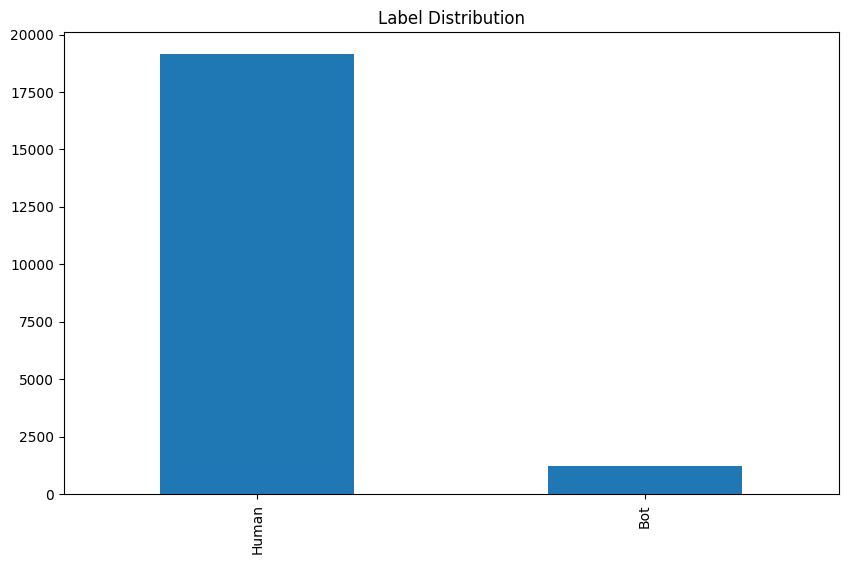

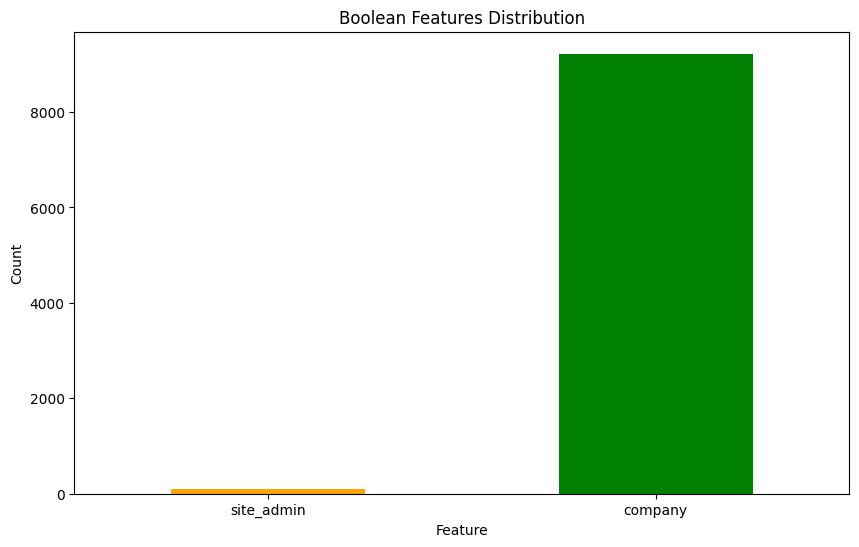

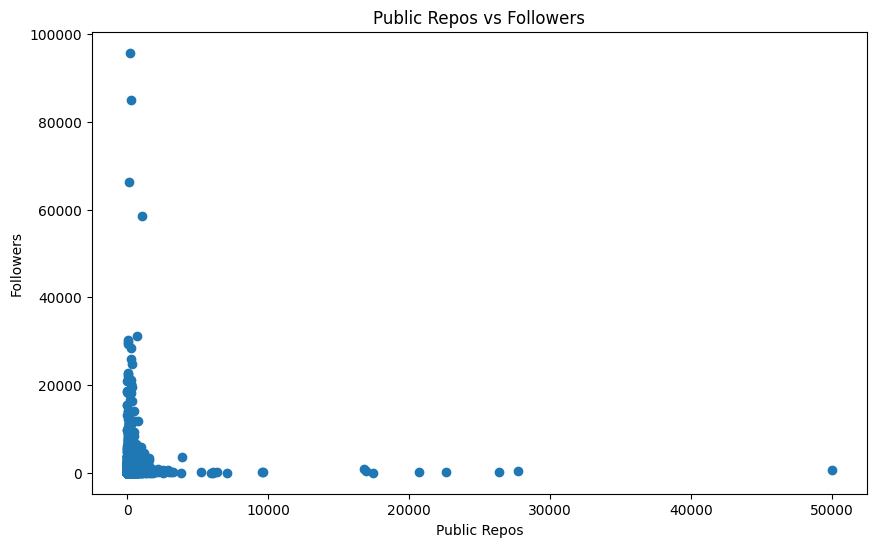

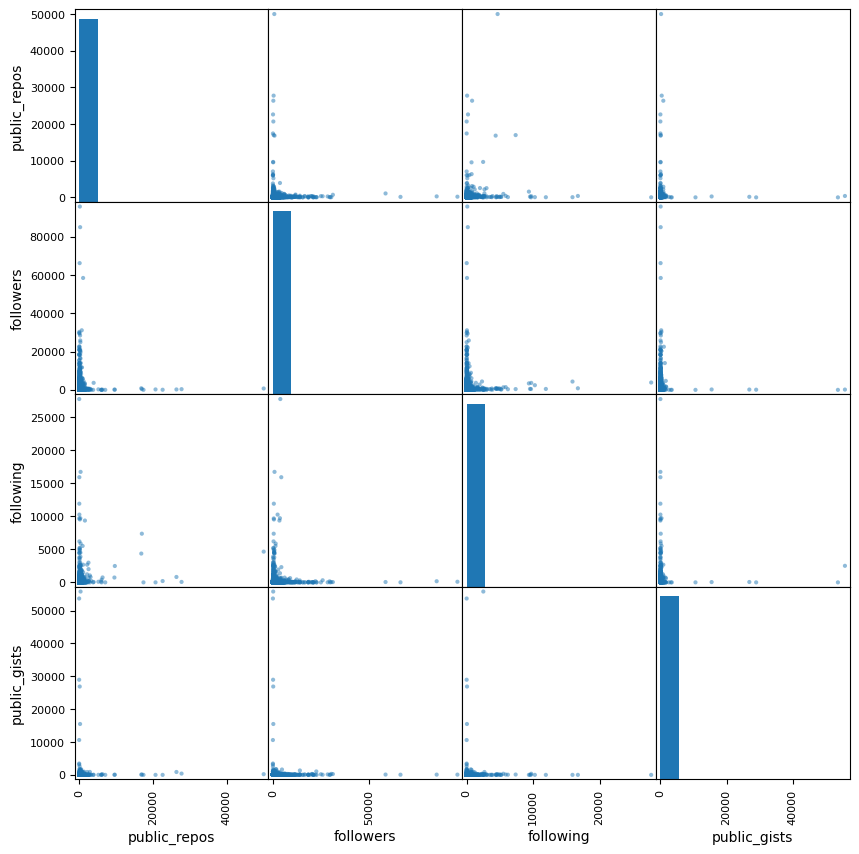

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# 示例数据加载
data = pd.read_csv("D:\\github_bot_raw_data.csv")  # 用实际路径替换

# 需要检查的布尔特征列
bool_features = ['site_admin', 'company']

# 处理布尔类型数据：将无法转换为数字的值替换为 False (0)，并确保列为布尔类型
def convert_to_boolean(value):
    if isinstance(value, str):
        if value.lower() in ['true', 'yes', '1']:  # 如果是代表 True 的字符串
            return True
        else:
            return False  # 否则都转换为 False
    return bool(value)

# 对布尔特征列应用清洗函数
for col in bool_features:
    data[col] = data[col].apply(convert_to_boolean).astype(int)

# 1. 条形图：label列的类别分布
data['label'].value_counts().plot(kind='bar', title='Label Distribution', figsize=(10, 6))
plt.show()

# 2. 展示布尔特征的总和
# 计算每个布尔特征列为True的数量（即每列的和）
bool_feature_sum = data[bool_features].sum()

# 设置图表的大小和样式
plt.figure(figsize=(10, 6))
bool_feature_sum.plot(kind='bar', title='Boolean Features Distribution', color=['orange', 'green'])
plt.xlabel('Feature')  # X轴标签
plt.ylabel('Count')    # Y轴标签
plt.xticks(rotation=0) # 设置x轴标签旋转角度为0，使标签易读
plt.show()

# 3. 直方图：log_public_repos分布（如果存在）
if 'log_public_repos' in data.columns:
    data['log_public_repos'].plot(kind='hist', bins=20, title='Log Public Repos Distribution', figsize=(10, 6))
    plt.show()

# 4. 散点图：public_repos vs. followers
plt.figure(figsize=(10, 6))
plt.scatter(data['public_repos'], data['followers'])
plt.title('Public Repos vs Followers')
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.show()

# 5. 散点矩阵
from pandas.plotting import scatter_matrix

scatter_features = ['public_repos', 'followers', 'following', 'public_gists']
scatter_matrix(data[scatter_features], figsize=(10, 10))
plt.show()


5. Seaborn绘制图表

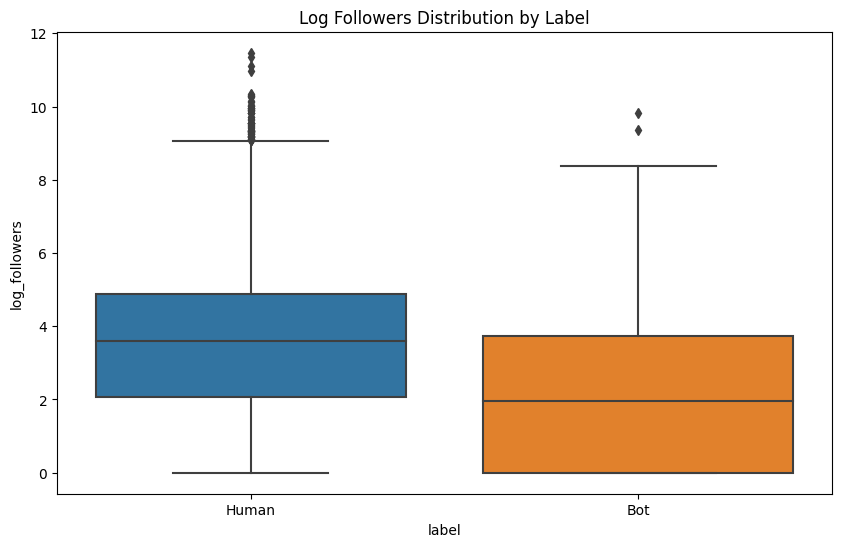

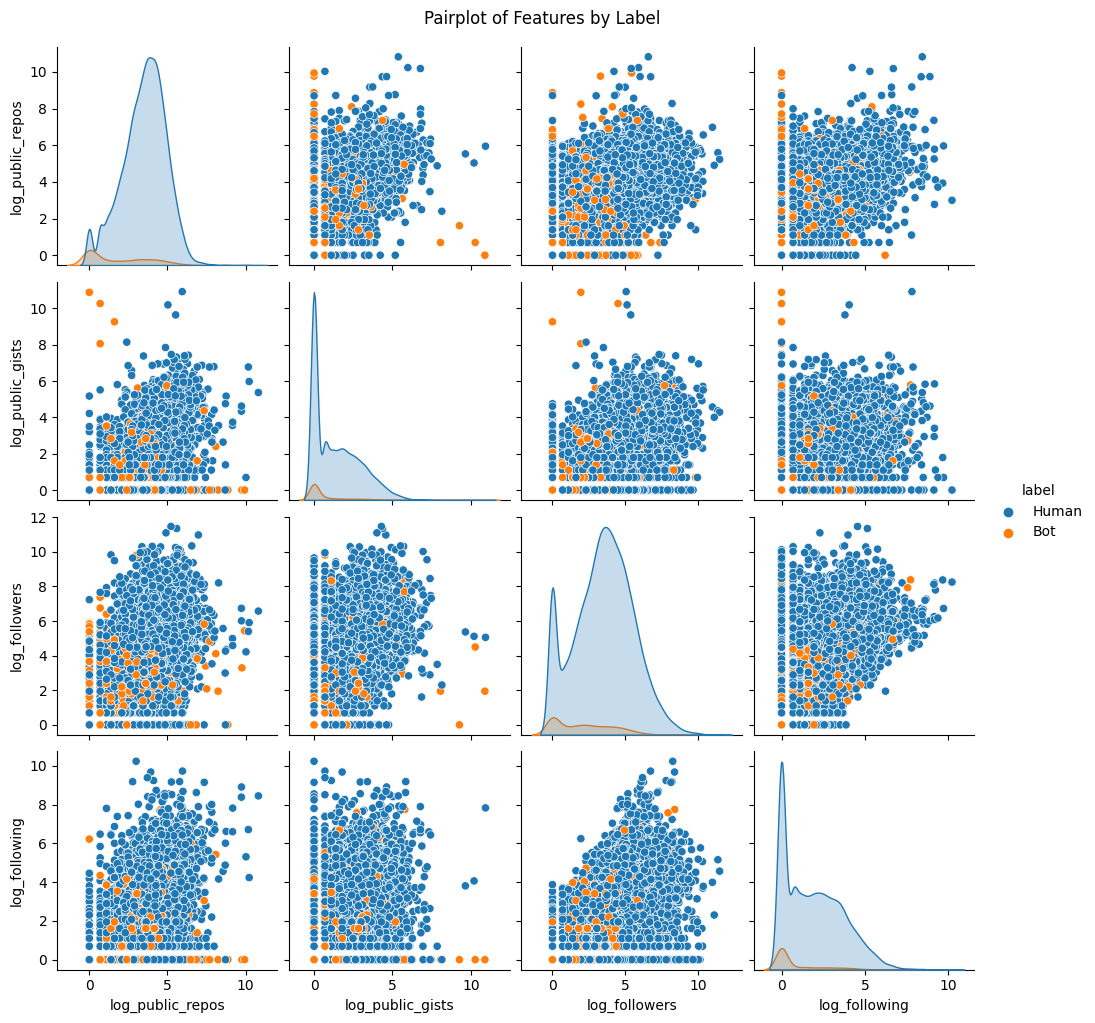

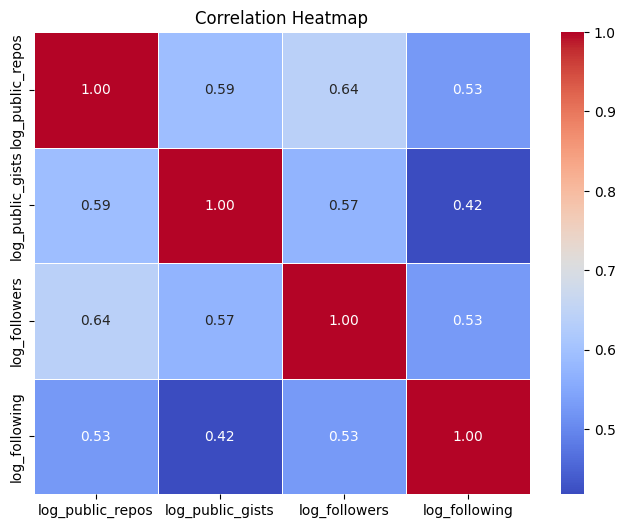

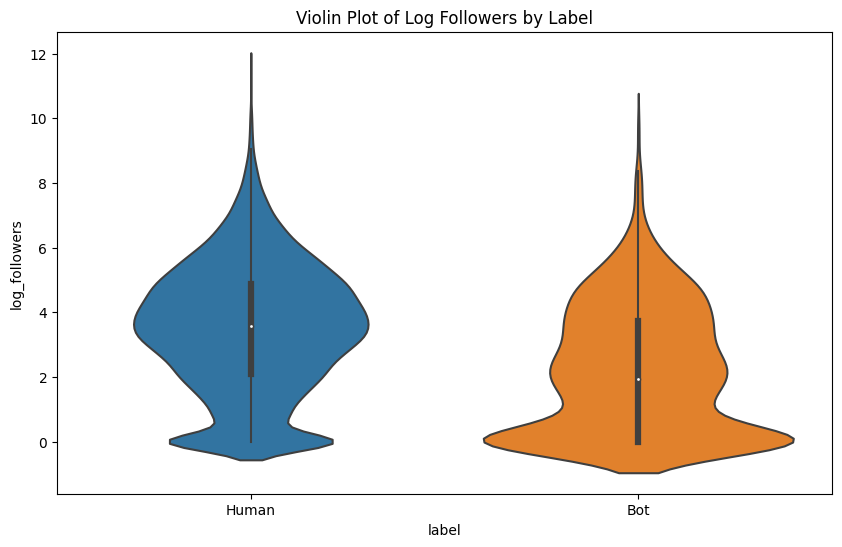

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 加载数据
data = pd.read_csv('D:/github_bot_raw_data.csv')  # 修改为实际的文件路径

# 转换布尔类型的特征
bool_features = ['site_admin', 'company']
data[bool_features] = data[bool_features].apply(lambda x: x.isin([True, 'True', 1]))  # 对每个元素应用isin

# 处理无穷值为NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# 对数变换
data['log_followers'] = data['followers'].apply(lambda x: np.log(x) if x > 0 else 0)  # log 转换
data['log_public_repos'] = data['public_repos'].apply(lambda x: np.log(x + 1))  # log 转换
data['log_public_gists'] = data['public_gists'].apply(lambda x: np.log(x + 1))  # log 转换
data['log_following'] = data['following'].apply(lambda x: np.log(x + 1))  # log 转换

# 1. 箱线图：展示不同label类别下log_followers的分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='log_followers', data=data)
plt.title('Log Followers Distribution by Label')
plt.show()

# 2. 成对图：展示不同特征之间的成对关系，并根据label分类
sns.pairplot(data, hue='label', vars=['log_public_repos', 'log_public_gists', 'log_followers', 'log_following'])
plt.suptitle('Pairplot of Features by Label', y=1.02)
plt.show()

# 3. 热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性
corr_data = data[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']]
correlation_matrix = corr_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 4. 小提琴图：展示label与log_followers之间的分布差异
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='log_followers', data=data)
plt.title('Violin Plot of Log Followers by Label')
plt.show()


In [5]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport  # 更新为 ydata_profiling
import warnings

# 禁用所有警告
warnings.filterwarnings("ignore", category=DeprecationWarning)  # 忽略弃用警告
warnings.filterwarnings("ignore", category=UserWarning)  # 忽略用户警告
warnings.filterwarnings("ignore", category=FutureWarning)  # 忽略未来警告


# 加载数据
df = pd.read_csv('D:/github_bot_raw_data.csv')

# 将 `--` 替换为 NaN，避免无法转换的字符
df.replace('--', np.nan, inplace=True)

# 生成数据报告，禁用缺失值热图的计算
profile = ProfileReport(df, 
                         title="GitHub Bot Data Report", 
                         missing_diagrams={"Heatmap": False},  # 禁用缺失值热图
                         explorative=True)

# 保存报告
profile.to_file("github_bot_data_report.html")

print("报告已保存至: github_bot_data_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

报告已保存至: github_bot_data_report.html
